In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
#path_data = os.path.dirname(__file__) # no funciona en jupyter
path_data = os.path.abspath('')
path_data

'/home/valengou/code/juanpedrobesenyi/cyberbullying/notebooks/valen'

In [3]:
path_raw_data = os.path.join(path_data, '../../raw_data/')
path_raw_data

'/home/valengou/code/juanpedrobesenyi/cyberbullying/notebooks/valen/../../raw_data/'

In [4]:
file_names = os.listdir(path=path_raw_data)
files = [file for file in file_names if file.endswith('.csv')]
files

['toxicity_parsed_dataset.csv',
 'aggression_parsed_dataset.csv',
 'cyberbullying_tweets.csv',
 'twitter_parsed_dataset.csv',
 'twitter_racism_parsed_dataset.csv',
 'twitter_sexism_parsed_dataset.csv',
 'youtube_parsed_dataset.csv',
 'kaggle_parsed_dataset.csv']

In [5]:
files = {file.replace('_parsed', '').replace('_dataset','').replace('.csv',''): file for file in file_names if file.endswith('.csv')}
files

{'toxicity': 'toxicity_parsed_dataset.csv',
 'aggression': 'aggression_parsed_dataset.csv',
 'cyberbullying_tweets': 'cyberbullying_tweets.csv',
 'twitter': 'twitter_parsed_dataset.csv',
 'twitter_racism': 'twitter_racism_parsed_dataset.csv',
 'twitter_sexism': 'twitter_sexism_parsed_dataset.csv',
 'youtube': 'youtube_parsed_dataset.csv',
 'kaggle': 'kaggle_parsed_dataset.csv'}

In [6]:
data_cyberbullying = pd.read_csv(path_raw_data+files['cyberbullying_tweets']).copy()
data_cyberbullying

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [7]:
data_cyberbullying=data_cyberbullying[data_cyberbullying['cyberbullying_type']!='not_cyberbullying']

In [8]:
data_cyberbullying.rename(columns={'tweet_text':'Text'},inplace=True)

/home/valengou/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
data_cyberbullying

,Text,cyberbullying_type
7945,rape is real..zvasiyana nema jokes about being...,gender
7946,You never saw any celebrity say anything like ...,gender
7947,"@ManhattaKnight I mean he's gay, but he uses g...",gender
7948,RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...,gender
7949,Rape is rape. And the fact that I read one pos...,gender
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [10]:
data_cyberbullying['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [66]:
files

{'toxicity': 'toxicity_parsed_dataset.csv',
 'aggression': 'aggression_parsed_dataset.csv',
 'cyberbullying_tweets': 'cyberbullying_tweets.csv',
 'twitter': 'twitter_parsed_dataset.csv',
 'twitter_racism': 'twitter_racism_parsed_dataset.csv',
 'twitter_sexism': 'twitter_sexism_parsed_dataset.csv',
 'youtube': 'youtube_parsed_dataset.csv',
 'kaggle': 'kaggle_parsed_dataset.csv'}

In [11]:
data_racism = pd.read_csv(path_raw_data+files['twitter_racism'], usecols=['Text', 'oh_label']).copy()
data_racism

,Text,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1
1,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1
3,"Finally I'm all caught up, and that sudden dea...",0
4,@carolinesinders @herecomesfran *hugs*,0
...,...,...
13466,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,0
13467,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,0
13468,Glad the proper competition is starting and ev...,0
13469,"No worries Pete and Manu, take all the time of...",0


In [12]:
data_racism=data_racism[data_racism['oh_label']==1]
data_racism

,Text,oh_label
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1
8,@HuffPostRelig Islam invaded and conquered 2/3...,1
9,@semzyxx Do you approve of your pedophile prop...,1
10,@watan71969 @geeky_zekey Problem with vile Mus...,1
...,...,...
13401,@UmarFarooq_ @FaheemHus @jackmjenkins For exam...,1
13418,Hopefully someone cooks Drasko in the next ep ...,1
13419,"The myth of ""moderate"" Islamic rebels. They a...",1
13423,@loveconcursall @ottomanland ISIS is a giant e...,1


In [13]:
data_racism['cyberbullying_type']='ethnicity'
data_racism.head()

/tmp/ipykernel_8708/516665345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_racism['cyberbullying_type']='ethnicity'


,Text,oh_label,cyberbullying_type
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1,ethnicity
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1,ethnicity
8,@HuffPostRelig Islam invaded and conquered 2/3...,1,ethnicity
9,@semzyxx Do you approve of your pedophile prop...,1,ethnicity
10,@watan71969 @geeky_zekey Problem with vile Mus...,1,ethnicity


In [14]:
data_racism.drop(columns='oh_label',inplace=True)
data_racism


/home/valengou/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Text,cyberbullying_type
0,@AAlwuhaib1977 Muslim mob violence against Hin...,ethnicity
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,ethnicity
8,@HuffPostRelig Islam invaded and conquered 2/3...,ethnicity
9,@semzyxx Do you approve of your pedophile prop...,ethnicity
10,@watan71969 @geeky_zekey Problem with vile Mus...,ethnicity
...,...,...
13401,@UmarFarooq_ @FaheemHus @jackmjenkins For exam...,ethnicity
13418,Hopefully someone cooks Drasko in the next ep ...,ethnicity
13419,"The myth of ""moderate"" Islamic rebels. They a...",ethnicity
13423,@loveconcursall @ottomanland ISIS is a giant e...,ethnicity


In [15]:
data_sexism = pd.read_csv(path_raw_data+files['twitter_sexism'], usecols=['Text', 'oh_label']).copy()
data_sexism

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1.0
1,There's some very hate able teams this year #MKR,0.0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0.0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0.0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1.0
...,...,...
14876,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0.0
14877,It is unconscionable that our regulatory bodie...,0.0
14878,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0.0
14879,#mkr Unbelievable how low Kat &amp; Andre wil...,0.0


In [16]:
data_sexism=data_sexism[data_sexism['oh_label']==1]
data_sexism

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1.0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1.0
5,RT @Wateronatrain: @MT8_9 You might like this ...,1.0
10,"RT @MetalBarbieDoll: But yea, apparently #Game...",1.0
13,:D @nkrause11 Dudes who go to culinary school:...,1.0
...,...,...
14862,RT @lukeyook: If they think that dessert is re...,1.0
14869,Girls claiming they're hot generally have an o...,1.0
14871,"RT @ur_so_vanilla: Nikki &amp; Katie, didn't y...",1.0
14872,DID U WRITE THAT URSELF OMG @joeldanger All gi...,1.0


In [17]:
data_sexism['cyberbullying_type']='gender'
data_sexism.head()

/tmp/ipykernel_8708/3577387958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sexism['cyberbullying_type']='gender'


,Text,oh_label,cyberbullying_type
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1.0,gender
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1.0,gender
5,RT @Wateronatrain: @MT8_9 You might like this ...,1.0,gender
10,"RT @MetalBarbieDoll: But yea, apparently #Game...",1.0,gender
13,:D @nkrause11 Dudes who go to culinary school:...,1.0,gender


In [18]:
data_sexism.drop(columns='oh_label',inplace=True)


/home/valengou/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
data_sexism

,Text,cyberbullying_type
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,gender
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",gender
5,RT @Wateronatrain: @MT8_9 You might like this ...,gender
10,"RT @MetalBarbieDoll: But yea, apparently #Game...",gender
13,:D @nkrause11 Dudes who go to culinary school:...,gender
...,...,...
14862,RT @lukeyook: If they think that dessert is re...,gender
14869,Girls claiming they're hot generally have an o...,gender
14871,"RT @ur_so_vanilla: Nikki &amp; Katie, didn't y...",gender
14872,DID U WRITE THAT URSELF OMG @joeldanger All gi...,gender


In [20]:
data=pd.concat([data_sexism,data_racism,data_cyberbullying])
data.head()

,Text,cyberbullying_type
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,gender
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",gender
5,RT @Wateronatrain: @MT8_9 You might like this ...,gender
10,"RT @MetalBarbieDoll: But yea, apparently #Game...",gender
13,:D @nkrause11 Dudes who go to culinary school:...,gender


In [21]:
data['cyberbullying_type'].value_counts()

gender                 11350
ethnicity               9931
religion                7998
age                     7992
other_cyberbullying     7823
Name: cyberbullying_type, dtype: int64

In [8]:

#df = pd.concat([dataset for dataset in data.values()], ignore_index=True)
#df

In [22]:
#file = 'toxicity_parsed_dataset.csv'
#df = pd.read_csv(path_raw_data+file, usecols=['Text', 'oh_label'])
data.rename(columns={'Text':'text', 'cyberbullying_type':'target'}, inplace=True)
#df.head()

In [23]:
data.head()

,text,target
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,gender
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",gender
5,RT @Wateronatrain: @MT8_9 You might like this ...,gender
10,"RT @MetalBarbieDoll: But yea, apparently #Game...",gender
13,:D @nkrause11 Dudes who go to culinary school:...,gender


In [27]:
def remove_duplicated_words(text):
    regex = r'\b(\w+)(?:\W+\1\b)+' 
    return re.sub(regex, r'\1', text, flags=re.IGNORECASE)

In [28]:
def remove_duplicated_phrase(text):
    regex = r'\b(\w+(?:\s*\w*))\s+\1\b'
    return re.sub(regex, "\\1", text, flags=re.IGNORECASE)

In [29]:
text = 'asd asd asd hello asd hello asd hello'

In [30]:
remove_duplicated_words(text)

'asd hello asd hello asd hello'

In [31]:
def clean_data(text,
               remove_punctuation=True,
               lower_text=True,
               remove_numbers=True,
               remove_stopwords=False, 
               lemmatize=False):
    
    text = str(text)
    
    # replace emojis with text
    #text = demoji.replace_with_desc(text, ' ')
    
    # keep only letters
    if remove_punctuation:
        text = re.sub(r'[^a-zA-Z]+', ' ', text)
    
    # lower text
    if lower_text:
        text = text.lower()
    
    # remove numbers
    if remove_numbers:
        text = ''.join([w for w in text if not w.isdigit()])
    
    # remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        text = ' '.join([w for w in word_tokens if not w in stop_words])
    
    # lemmatize
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        text = ''.join([lemmatizer.lemmatize(word) for word in text]) # no entiendo por qué no va un espacio
    
    # spam
    text = remove_duplicated_words(text)
    
    text= remove_duplicated_phrase(text)
    
    text = text.strip()
    
    return text

In [32]:
def clean_df(df, 
            remove_punctuation=True,
            lower_text=True,
            remove_numbers=True,
            remove_stopwords=False, 
            lemmatize=False):
    
    df = df.copy()
    
    df = df.drop_duplicates()
    
    df['text'] = df['text'].apply(lambda text: clean_data(text,
                                                          remove_punctuation,
                                                          lower_text,
                                                          remove_numbers,
                                                          remove_stopwords,
                                                          lemmatize))
    
    df = df.drop_duplicates()
    
    df = df.replace(['', ' '], np.nan)
    df = df.dropna().reset_index(drop=True)
    
    return df

In [33]:
%%time

data = clean_df(data)

CPU times: user 4.69 s, sys: 28.6 ms, total: 4.72 s
Wall time: 4.72 s


In [34]:
data

,text,target
0,rt beepss senna beepss i m not sexist but fuck...,gender
1,no you don t shut up jeff i thought of a reall...,gender
2,rt wateronatrain mt you might like this http t...,gender
3,rt metalbarbiedoll but yea apparently gamergat...,gender
4,d nkrause dudes who go to culinary school why ...,gender
...,...,...
42442,black ppl aren t expected to do anything depen...,ethnicity
42443,turner did not withhold his disappointment tur...,ethnicity
42444,i swear to god this dumb nigger bitch i have g...,ethnicity
42445,yea fuck you rt therealexel if youre a nigger ...,ethnicity


In [17]:
%%time

#df = clean_df(df)
#df.head()

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 17.4 µs


In [18]:
#df.shape

In [35]:
data.keys()

Index(['text', 'target'], dtype='object')

In [86]:
def plot_hist(X):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    len_ = [len(_.split()) for _ in X]
    ax1.hist(len_)
    ax1.set_title('All length')
    
    n = 400
    
    len_2 = [_ for _ in len_ if _ < n]
    ax2.hist(len_2)
    ax2.set_title(f'Only ≤ {n} words')
    
    plt.suptitle('Histogram of the number of sentences that have a given number of words')
    plt.tight_layout(pad=1)
    plt.show()

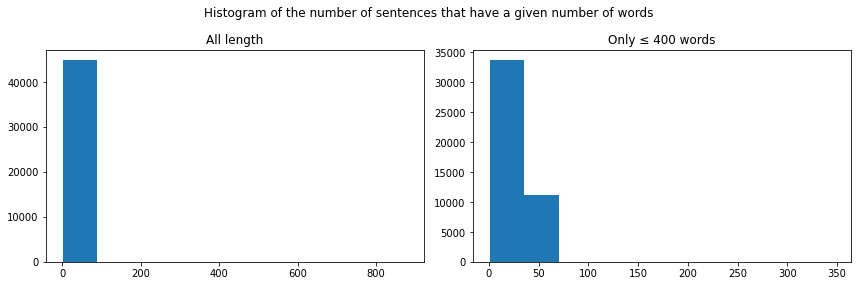

In [87]:
plot_hist(data['text'])

In [36]:

data.to_csv(f'../../cyberbullying/data/classified_racism_tweets.csv', index=False)

In [29]:
%%time

for name in data.keys():
    data[name] = clean_df(data[name],
                          remove_punctuation=False,
                          lower_text=False,
                          remove_numbers=False,
                          remove_stopwords=True,
                          lemmatize=True)

CPU times: user 14min 53s, sys: 16.6 s, total: 15min 10s
Wall time: 15min 10s


In [30]:
df = pd.concat([dataset for dataset in data.values()], ignore_index=True).drop_duplicates().reset_index(drop=True)
df.head()

,text,target
0,one make analogy mathematical terms envisionin...,0.0
1,clarification zundark right checked wikipedia ...,0.0
2,elected electoral jhk,0.0
3,fun entry devotchka coworker korea tell differ...,0.0
4,please relate ozone hole increases cancer prov...,0.0


In [31]:
for name, file in files.items():
    data[name].to_csv(f'../../cyberbullying/data/lem_{file}', index=False)
df.to_csv(f'../../cyberbullying/data/lem_all_df.csv', index=False)

In [32]:
#df.to_csv('../../cyberbullying/data/all_data.csv', index=False)

In [33]:
#%%time
#df_lem = clean_df(df, remove_punctuation=False, lower_text=False, remove_numbers=False, remove_stopwords=True, lemmatize=True)
#df_lem.head()

In [34]:
#df_lem.shape

In [35]:
#df_lem.to_csv('../../cyberbullying/data/all_data_lem.csv', index=False)